# EJERCICIOS

In [1]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Input
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Correccion
- EJERCICIO 1: La capa de activación de la última pregunta no está bien.

- EJERCICIO 2:

    -  Prueba con otras tasas de aprendizaje para ver si consigues el porcentaje que se pide. Por ejemplo: tasas_de_aprendizaje = [1., 0.5, 0.3, 0.1, 0.01]

    -   Falta imprimir la mejor tasa de aprendizaje y su accuracy

- EJERCICIO 3: Bien

- EJERCICIO 4: Para mejorar añade más neuronas a las capas

## EJERCICIO 1

¿Cuántas neuronas hacen falta en la capa de salida para clasificar emails entre correo no deseado y correo deseado? 
 - 1

¿Qué función de activación deberías usar en la capa de salida? 
 - Sigmoide

Si, en cambio, quieres enfrentarte a MNIST, ¿cuántas neuronas necesitas en la capa de salida y qué función de activación deberías usar? 
 - 10 neuronas (1 neurona por clase), funcion de activacion: Softmax

¿Y si quieres que la red prediga los precios de la vivienda en California?
 - 1 neurona, ninguna funcion de activacion

## EJERCICIO 2

Entrena un red neuronal profunda con el conjunto de datos MNIST (puedes cargarlo con tf. keras. datasets.minst.load_data()). Intenta conseguir la mejor pruebas en el conjunto de validación  ajustando los hiperparámetros de modo manual. Prueba a buscar una buena tasa de aprendizaje y utiliza la detención temprana (mínimo hay que conseguir un 97%).

Pasos a seguir: 
+ Entrena varios modelos con distintas tasas de aprendizaje
+ Guarda cada modelo en un fichero
+ Carga cada modelo y evalúalo en el conjunto de cargas y quedate con programación con el mejor (bucle que se quede con el mejor), mostrando la tasa de aprendizaje y la exactitud del mejor modelo.

Si no obtienes más de un 97% vuelve a empezar.

#### Obtener, separar datos

In [2]:
mnist = tf.keras.datasets.mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = mnist

#Dividimos los datos completos de entrenamiento en datos de entrenamiento y validación
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [3]:
X_train.shape[1:]

(28, 28)

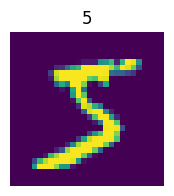

In [4]:
plt.figure(figsize=(2, 2))
plt.imshow(X_train[0])
plt.axis('off')   # quita los ejes
plt.title(y_train[0])
plt.show()

#### Entrenar varios modelos

In [5]:
# 1 entrada, 2 ocultas y 1 salida de 10 neuronas(1 por clase)
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=X_train.shape[1:]),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(124, activation="relu"),
    tf.keras.layers.Dense(80, activation="relu"),
    tf.keras.layers.Dense(30, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")  
])

In [6]:
# creamos carpeta si no existe para guardar los modelos y checkpoint
ruta_dir_mod = './recursos/modelos/4_3_2'
if not os.path.exists(ruta_dir_mod):
    os.mkdir(ruta_dir_mod)
if not os.path.exists('./recursos/checkpoint'):
    os.mkdir('./recursos/checkpoint')


In [7]:
# Si no mejora en 7 iteraciones el modelo para de entrenar
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=4, restore_best_weights=True)
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("./recursos/checkpoint/4_3_2_checkpoints.weights.h5", save_weights_only=True)

historys = [] 
rangos = [7e-4, 5e-4, 1e-4, 7e-3, 5e-3, 3e-3, 1e-3, 5e-2, 3e-2, 1e-2, 0.5, 0.1]
for lr in rangos :
    print('Learning rate: ',lr)
    # Se compila el modelo con el optimizador   
    model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(learning_rate=lr),   # asignar tasa de aprendizaje
              metrics=['accuracy'])
    # entrenar
    hist = model.fit(X_train, y_train, epochs=70, validation_data=(X_valid, y_valid), 
                     callbacks=[checkpoint_cb,early_stopping_cb])
    historys.append(hist)
    
    # guardar
    ruta = "./recursos/modelos/4_3_2/my_keras_model_lr{}.keras".format(lr)
    model.save(ruta)
    print('\n\n')

Learning rate:  0.0007
Epoch 1/70
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6068 - loss: 2.8966 - val_accuracy: 0.8680 - val_loss: 0.4658
Epoch 2/70
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8773 - loss: 0.4691 - val_accuracy: 0.9264 - val_loss: 0.2817
Epoch 3/70
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9234 - loss: 0.2821 - val_accuracy: 0.9494 - val_loss: 0.2076
Epoch 4/70
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9429 - loss: 0.2069 - val_accuracy: 0.9570 - val_loss: 0.1751
Epoch 5/70
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9582 - loss: 0.1482 - val_accuracy: 0.9622 - val_loss: 0.1550
Epoch 6/70
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9653 - loss: 0.1152 - val_accuracy: 0.9644 - val_loss: 0.1448
Epoch 7/70
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9699 - loss: 0.1042 - val_accuracy: 0.9666 - val_loss: 0.1219
Epoch 8/70
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0

In [8]:
for i in range(len(historys)):
    # mostramos el historial de entrenamiento 
    print(' Modelo_{}: {}'.format(i,historys[i].params))


 Modelo_0: {'verbose': 'auto', 'epochs': 70, 'steps': 1719}
 Modelo_1: {'verbose': 'auto', 'epochs': 70, 'steps': 1719}
 Modelo_2: {'verbose': 'auto', 'epochs': 70, 'steps': 1719}
 Modelo_3: {'verbose': 'auto', 'epochs': 70, 'steps': 1719}
 Modelo_4: {'verbose': 'auto', 'epochs': 70, 'steps': 1719}
 Modelo_5: {'verbose': 'auto', 'epochs': 70, 'steps': 1719}
 Modelo_6: {'verbose': 'auto', 'epochs': 70, 'steps': 1719}
 Modelo_7: {'verbose': 'auto', 'epochs': 70, 'steps': 1719}
 Modelo_8: {'verbose': 'auto', 'epochs': 70, 'steps': 1719}
 Modelo_9: {'verbose': 'auto', 'epochs': 70, 'steps': 1719}
 Modelo_10: {'verbose': 'auto', 'epochs': 70, 'steps': 1719}
 Modelo_11: {'verbose': 'auto', 'epochs': 70, 'steps': 1719}


#### Cargar y evaluar con bucle

In [9]:
# cargar
modelos = os.listdir(ruta_dir_mod)
mejor_acc = 0
mejor_modelo = None
mejor_lr = None
for mod_ruta in modelos:
    model = tf.keras.models.load_model(ruta_dir_mod+'/'+mod_ruta)
    # evaluar
    print('Evaluacion {}: '.format(mod_ruta))
    eval_loss, eval_accuracy = model.evaluate(X_test, y_test)
    if mejor_acc < eval_accuracy: 
        mejor_acc = eval_accuracy
        mejor_modelo = model
        mejor_lr = mod_ruta.split('lr')[1].removesuffix('.keras')
print('Mejor modelo\n Learning rate: {}   Accuracy: {}'.format(mejor_lr,mejor_acc))

Evaluacion my_keras_model_lr0.0001.keras: 
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 966us/step - accuracy: 0.9747 - loss: 0.1506
Evaluacion my_keras_model_lr0.0005.keras: 
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9719 - loss: 0.1545  
Evaluacion my_keras_model_lr0.0007.keras: 
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9706 - loss: 0.1191
Evaluacion my_keras_model_lr0.001.keras: 
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 954us/step - accuracy: 0.1160 - loss: 2.3009
Evaluacion my_keras_model_lr0.003.keras: 
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 943us/step - accuracy: 0.1160 - loss: 2.3008
Evaluacion my_keras_model_lr0.005.keras: 
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 948us/step - accuracy: 0.1160 - loss: 2.3006
Evaluacion my_keras_model_lr0.007.keras: 
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 950us/step - accuracy: 0.1160 - loss: 2.3011
Evaluacion my_keras_model_lr0.01.keras: 
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 945us/step - accuracy: 0.1027 - loss: 2.3034
Evaluacion my_keras_model_lr0.03.keras: 
313/313

## EJERCICIO 3

Clasificación de Imágenes de Dígitos Escritos a Mano:

* Objetivo: Entrenar una red neuronal para clasificar imágenes de dígitos escritos a mano utilizando el conjunto de datos SVHN (Street View House Numbers).

* Tareas: 
    * Cargar el conjunto de datos, dividir los datos (train, valid y test), explorar los datos representando alguna imagen con su etiqueta y muestra los valores (únicos) de y (en el entrenamiento, en validación y en pruebas), preparar los datos (d normalizar dividiendo entre 255.0 e igual hay que hacer algo más), construir, compilar y entrenar una red neuronal. 

    * Utilizar detección temprana

    * Hacer una gráfica de como evoluciona accuracy y val_accuracy durante el entrenamiento

    * Si es necesario ajustar el modelo para lograr una mayor precisión.

    * Evalúar el modelo en el conjunto de test y hacer alguna predicción (representa alguna imagen con su etiqueta real y la predicha)

### Dividir datos

In [10]:
def load_svhn_data(url):
    path = tf.keras.utils.get_file("svhn.mat", url)
    data = loadmat(path)
    return np.transpose(data["X"], (3, 0, 1, 2)), data["y"].flatten()

# Cargar datos
train_url = "http://ufldl.stanford.edu/housenumbers/train_32x32.mat"
test_url = "http://ufldl.stanford.edu/housenumbers/test_32x32.mat"
X_train_full, y_train_full = load_svhn_data(train_url)
# entrenamiento y validacion
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.15, random_state=42, stratify=y_train_full)
# prueba
X_test, y_test = load_svhn_data(test_url)

### Explorar datos

In [11]:
print('len: ',len(X_train))
X_train[0]

len:  62268


array([[[103, 110, 125],
        [103, 110, 126],
        [105, 112, 128],
        ...,
        [ 71,  80,  98],
        [ 66,  78,  95],
        [ 63,  76,  93]],

       [[104, 112, 126],
        [105, 112, 127],
        [104, 113, 128],
        ...,
        [ 53,  61,  86],
        [ 43,  52,  76],
        [ 38,  47,  71]],

       [[105, 115, 127],
        [105, 116, 128],
        [105, 115, 127],
        ...,
        [ 39,  43,  73],
        [ 32,  36,  65],
        [ 31,  36,  65]],

       ...,

       [[105, 111, 127],
        [103, 110, 126],
        [104, 110, 128],
        ...,
        [ 93,  96, 117],
        [102, 106, 125],
        [107, 111, 128]],

       [[105, 111, 127],
        [103, 109, 125],
        [106, 112, 128],
        ...,
        [103, 106, 126],
        [105, 110, 128],
        [108, 113, 132]],

       [[106, 112, 128],
        [105, 111, 127],
        [107, 113, 130],
        ...,
        [106, 109, 130],
        [107, 112, 131],
        [108, 113, 132]]

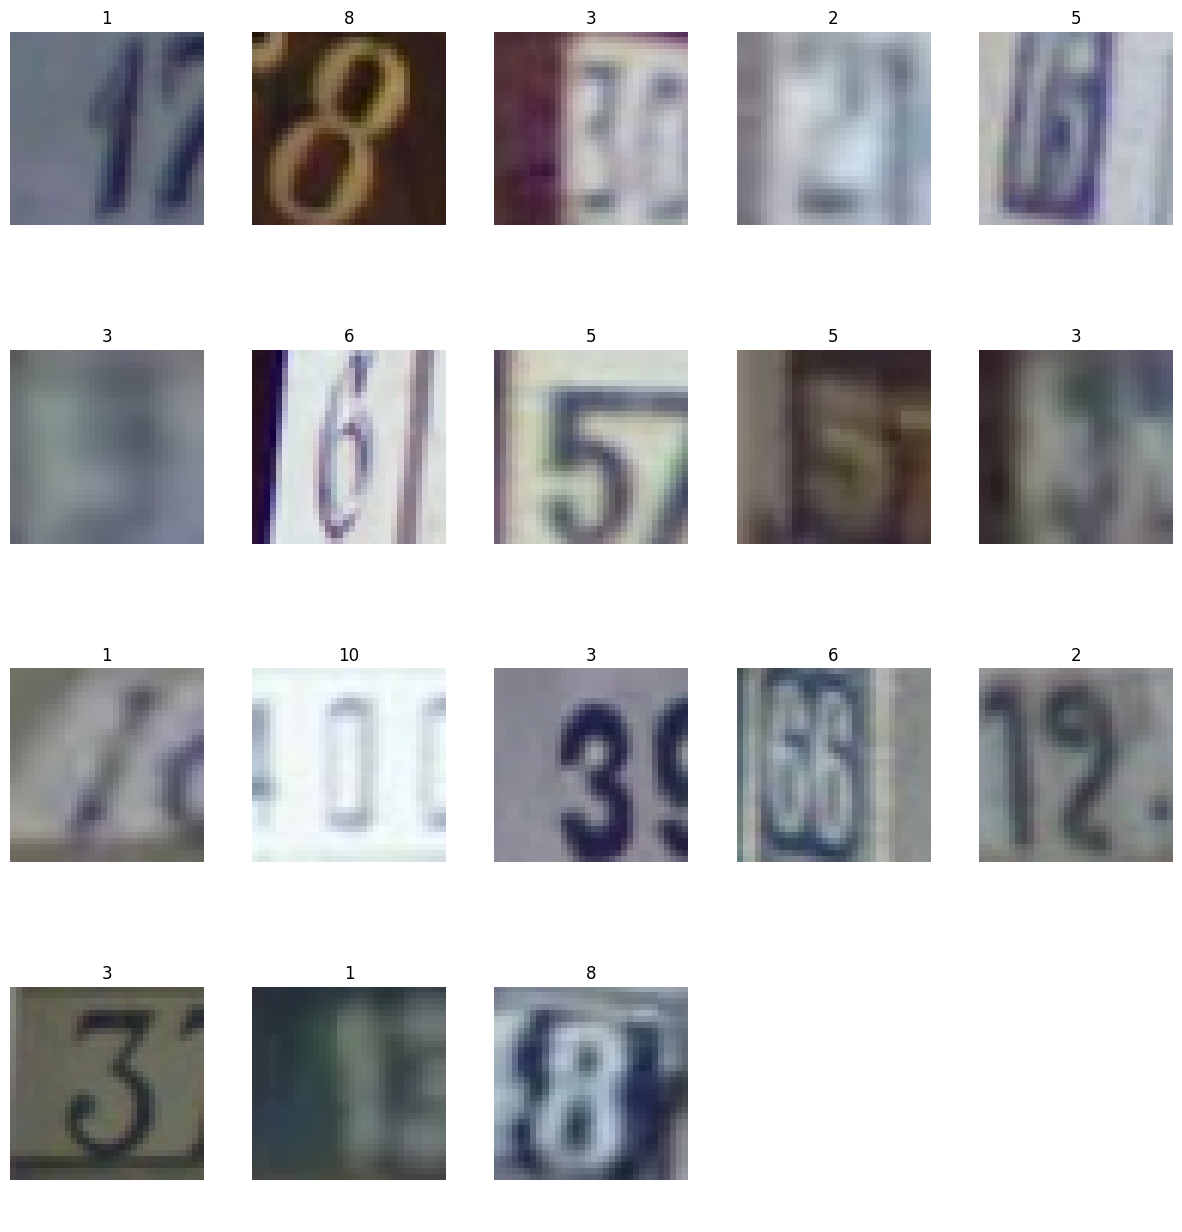

In [12]:
# mostrar una imagen
def mostrar_img(img, y):
    plt.figure(figsize=(2, 2))
    plt.imshow(img)
    plt.axis('off')   # quita los ejes
    plt.title(y)
    plt.show()
# for i in range(6): mostrar_img(X_train[i],y_train[i])

# muestra varias imagenes a la vez (solo con el for quedaba muy feo)
def listar_imgs(imgs_arr, y_arr, pred_arr):
    n_fila = int(np.ceil((len(imgs_arr))/5))
    fig,ax = plt.subplots(n_fila,5, figsize=(15,n_fila*4))
    ax = ax.flatten()
    # aniadimos las imagenes al grafico
    for i, img in enumerate(imgs_arr):
        title_txt = y_arr[i]
        if pred_arr is not None: 
            title_txt = '{}  Sol:{}'.format(pred_arr[i],title_txt)           
        ax[i].set_title(title_txt)
        ax[i].imshow(img, cmap="gray")
        ax[i].axis("off") 
    # eliminamos los huecos vacios
    for ax_vacio in ax[len(imgs_arr):]:  ax_vacio.axis("off")
    plt.subplots_adjust(wspace=0.25, hspace=0.15)   # ajusta los margenes para separar las imágenes 
    plt.show()

listar_imgs(X_train[:18], y_train[:18],None)   

In [13]:
# valores de y
values,count = np.unique(y_train,return_counts=True)
for y, cant in zip(values,count):
    print(y,' --> ',cant)

1  -->  11782
2  -->  8997
3  -->  7222
4  -->  6339
5  -->  5850
6  -->  4868
7  -->  4756
8  -->  4288
9  -->  3960
10  -->  4206


### Preparar

0  -->  4206
1  -->  11782
2  -->  8997
3  -->  7222
4  -->  6339
5  -->  5850
6  -->  4868
7  -->  4756
8  -->  4288
9  -->  3960
[[[0.40392157 0.43137255 0.49019608]
  [0.40392157 0.43137255 0.49411765]
  [0.41176471 0.43921569 0.50196078]
  ...
  [0.27843137 0.31372549 0.38431373]
  [0.25882353 0.30588235 0.37254902]
  [0.24705882 0.29803922 0.36470588]]

 [[0.40784314 0.43921569 0.49411765]
  [0.41176471 0.43921569 0.49803922]
  [0.40784314 0.44313725 0.50196078]
  ...
  [0.20784314 0.23921569 0.3372549 ]
  [0.16862745 0.20392157 0.29803922]
  [0.14901961 0.18431373 0.27843137]]

 [[0.41176471 0.45098039 0.49803922]
  [0.41176471 0.45490196 0.50196078]
  [0.41176471 0.45098039 0.49803922]
  ...
  [0.15294118 0.16862745 0.28627451]
  [0.1254902  0.14117647 0.25490196]
  [0.12156863 0.14117647 0.25490196]]

 ...

 [[0.41176471 0.43529412 0.49803922]
  [0.40392157 0.43137255 0.49411765]
  [0.40784314 0.43137255 0.50196078]
  ...
  [0.36470588 0.37647059 0.45882353]
  [0.4        0.415

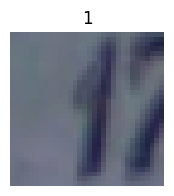

In [14]:
# la solucion de 0 tiene que ser 0, no 10
y_train = np.where(y_train == 10, 0, y_train)
y_val = np.where(y_val == 10, 0, y_val)
y_test = np.where(y_test == 10, 0, y_test)

# normalizar 
X_train = X_train/255.0
X_val = X_val/255.0
X_test = X_test/255.0

# comprobacion
values,count = np.unique(y_train,return_counts=True)
for y, cant in zip(values,count):
    print(y,' --> ',cant)
print(X_train[0])
mostrar_img(X_train[0],y_train[0])

### Crear y entrenar

In [15]:
# deteccion temprana
early_stopping_cb = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=5, restore_best_weights=True)
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("./recursos/checkpoint/4_3_3_checkpoints.weights.h5", save_weights_only=True)

modelos = []
history = []
rangos = [3e-4, 5e-4, 5e-3]
for lr in rangos:
    # crear
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=X_train.shape[1:]),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(248, activation="relu"),
        tf.keras.layers.Dense(124, activation="relu"),
        tf.keras.layers.Dense(64, activation="relu"),
        tf.keras.layers.Dense(10, activation="softmax")  
    ])
    # compilar
    model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=lr),   #  asignar tasa de aprendizaje
                metrics=['accuracy'])
    # entrenar
    hist = model.fit(X_train, y_train, epochs=40, validation_data=(X_val, y_val), 
                    callbacks=[checkpoint_cb,early_stopping_cb])
    modelos.append(model)
    history.append(hist)


Epoch 1/40
1946/1946 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.1893 - loss: 2.2322 - val_accuracy: 0.3759 - val_loss: 1.8507
Epoch 2/40
1946/1946 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.4532 - loss: 1.6293 - val_accuracy: 0.6057 - val_loss: 1.2591
Epoch 3/40
1946/1946 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.6198 - loss: 1.1998 - val_accuracy: 0.6608 - val_loss: 1.0829
Epoch 4/40
1946/1946 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.6646 - loss: 1.0800 - val_accuracy: 0.6680 - val_loss: 1.0479
Epoch 5/40
1946/1946 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.6884 - loss: 1.0027 - val_accuracy: 0.6972 - val_loss: 0.9721
Epoch 6/40
1946/1946 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.7123 - loss: 0.9497 - val_accuracy: 0.7244 - val_loss: 0.9188
Epoch 7/40
1946/1946 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7199 - loss: 0.9093 - val_accuracy: 0.7294 - val_loss: 0.8836
Epoch 8/40
1946/1946 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7337 - loss: 0

### Evaluar

In [16]:
mejor_acc = 0
mejor_mod = None
mejor_hist = None
i = 0
for model in modelos:
    eval_loss,eval_acc = model.evaluate(X_test,y_test)
    print('Accuracy: ',eval_acc,'  Loss: ',eval_loss)
    if eval_acc > mejor_acc:
        mejor_acc = eval_acc
        mejor_mod = model
        mejor_hist = history[i]
    i += 1

2290/2290 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8443 - loss: 0.5117
Accuracy:  0.8430730104446411   Loss:  0.5159733295440674
2290/2290 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7915 - loss: 0.6726
Accuracy:  0.7900815010070801   Loss:  0.6763170957565308
2290/2290 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1905 - loss: 2.2363
Accuracy:  0.18921059370040894   Loss:  2.2373504638671875


### Grafico


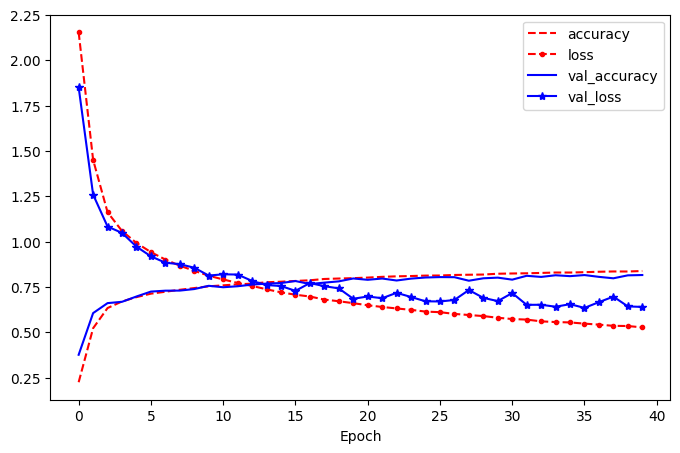

In [17]:
pd.DataFrame(mejor_hist.history).plot(
    figsize=(8, 5), xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.legend()
plt.show()

### Predecir

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


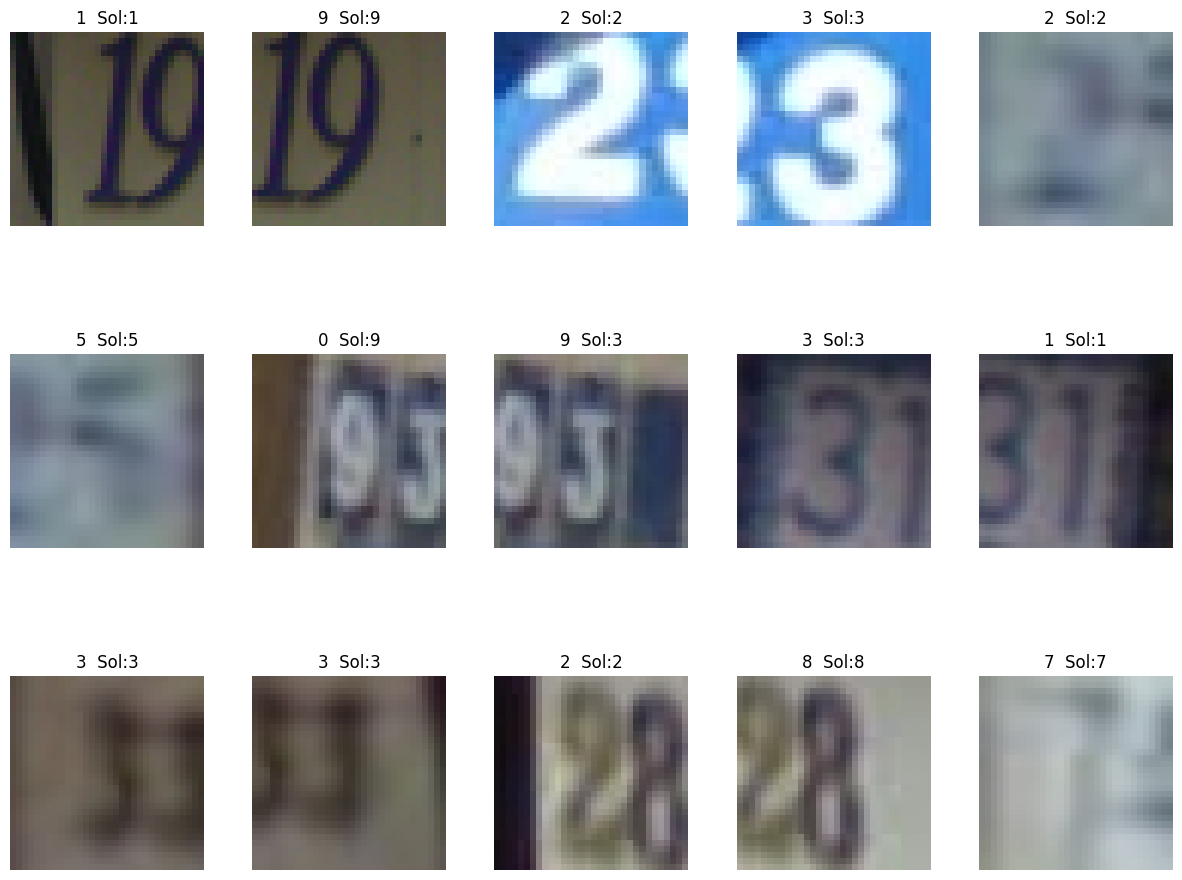

In [18]:
# predecir 15
x_prub = X_test[:15]
y_prub = y_test[:15]
y_proba = mejor_mod.predict(x_prub)
y_pred = y_proba.argmax(axis=-1)
listar_imgs(x_prub,y_prub,y_pred)

## EJERCICIO 4

Predicción del consumo de energía:

* Objetivo: Construir una red neuronal para predecir el consumo de energía de edificios a partir de características como la temperatura, humedad, y tiempo del conjunto de datos Energy Efficiency de UCI Machine Learning Repository

* Tareas: 
    * Cargar el conjunto de datos, dividir los datos (train, valid y test), explorar los datos, preparar los datos (normalizar con una capa de normalización), construir un modelo de regresión, compilar y entrenar una red neuronal. 
    
    * Usa X1-X8 para la X e Y1-Y2 para la y

    * Ajusta el modelo hasta encontrar un error absoluto medio aceptable

    * Haz una gráfica de como evoluciona el error absoluto medio y error absoluto medio del conjunto de validación durante el entrenamiento

    * Evalúa el modelo en el conjunto de test y haz alguna predicción (muestra el valor predicho y el real)

### Obtener, explorar datos

In [19]:
# Descargar el conjunto de datos de eficiencia energética de UCI
url = ("https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx")
data = pd.read_excel(url)
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [21]:
data.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [22]:
corr_matrix = data.corr(numeric_only=True)
corr_matrix.style.background_gradient()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
X1,1.000000,-0.991901,-0.203782,-0.868823,0.827747,0.000000,-0.000000,-0.000000,0.622272,0.634339
X2,-0.991901,1.000000,0.195502,0.880720,-0.858148,-0.000000,0.000000,0.000000,-0.658120,-0.672999
X3,-0.203782,0.195502,1.000000,-0.292316,0.280976,-0.000000,-0.000000,0.000000,0.455671,0.427117
X4,-0.868823,0.880720,-0.292316,1.000000,-0.972512,-0.000000,-0.000000,-0.000000,-0.861828,-0.862547
X5,0.827747,-0.858148,0.280976,-0.972512,1.000000,0.000000,0.000000,-0.000000,0.889430,0.895785
X6,0.000000,-0.000000,-0.000000,-0.000000,0.000000,1.000000,-0.000000,-0.000000,-0.002587,0.014290
X7,-0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,1.000000,0.212964,0.269842,0.207505
X8,-0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.212964,1.000000,0.087368,0.050525
Y1,0.622272,-0.658120,0.455671,-0.861828,0.889430,-0.002587,0.269842,0.087368,1.000000,0.975862
Y2,0.634339,-0.672999,0.427117,-0.862547,0.895785,0.014290,0.207505,0.050525,0.975862,1.000000


In [23]:
print(data['X5'].value_counts(),'\n'
      ,data['X6'].value_counts(),'\n'
      ,data['X7'].value_counts(),'\n'
      ,data['X8'].value_counts(),'\n')

X5
7.0    384
3.5    384
Name: count, dtype: int64 
 X6
2    192
3    192
4    192
5    192
Name: count, dtype: int64 
 X7
0.10    240
0.25    240
0.40    240
0.00     48
Name: count, dtype: int64 
 X8
1    144
2    144
4    144
3    144
5    144
0     48
Name: count, dtype: int64 



### Dividir

In [24]:
y = data[['Y1','Y2']]
x = data.drop(['Y1','Y2'], axis=1)

X_train_full, x_test, y_train_full, y_test = train_test_split(x,y, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.15, random_state=42)
X_val.head()

,X1,X2,X3,X4,X5,X6,X7,X8
458,0.74,686.0,245.0,220.5,3.5,4,0.25,4
100,0.90,563.5,318.5,122.5,7.0,2,0.10,2
645,0.76,661.5,416.5,122.5,7.0,3,0.40,3
602,0.74,686.0,245.0,220.5,3.5,4,0.40,2
319,0.71,710.5,269.5,220.5,3.5,5,0.25,1


### Entrenar

In [25]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(monitor='val_mean_absolute_error', patience=5, restore_best_weights=True)
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("./recursos/checkpoint/4_3_4_checkpoints.weights.h5", save_weights_only=True)
    
modelos = []
history = []
rangos = [3e-4, 5e-4, 5e-3]
for lr in rangos:
    # crear capas
    model = tf.keras.Sequential([
        tf.keras.layers.Normalization(input_shape=X_train.shape[1:]),
        tf.keras.layers.Dense(80, activation="relu"),
        tf.keras.layers.Dense(50, activation="relu"),
        tf.keras.layers.Dense(20, activation="relu"),
        tf.keras.layers.Dense(2)
    ])

    # compilar
    model.compile(loss=tf.keras.losses.MeanAbsoluteError(), 
                optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
                metrics=[tf.keras.metrics.MeanAbsoluteError()])

    # entrenar
    hist = model.fit(X_train, y_train, epochs=70, validation_data=(X_val, y_val), 
                        callbacks=[checkpoint_cb,early_stopping_cb])
    
    modelos.append(model)
    history.append(hist)

Epoch 1/70


c:\Python311\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 51.2758 - mean_absolute_error: 51.2758 - val_loss: 20.0895 - val_mean_absolute_error: 20.0895
Epoch 2/70
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 12.9589 - mean_absolute_error: 12.9589 - val_loss: 5.5505 - val_mean_absolute_error: 5.5505
Epoch 3/70
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7.0020 - mean_absolute_error: 7.0020 - val_loss: 5.3868 - val_mean_absolute_error: 5.3868
Epoch 4/70
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.9316 - mean_absolute_error: 5.9316 - val_loss: 4.3355 - val_mean_absolute_error: 4.3355
Epoch 5/70
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.3016 - mean_absolute_error: 5.3016 - val_loss: 4.0932 - val_mean_absolute_error: 4.0932
Epoch 6/70
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.4637 - mean_absolute_error: 4.4637 - val_loss: 3.8999 - val_mean_absolute_error: 3.8999
Epoch 7/70
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.4079 - mean_absolute_error: 4.4079 - val_loss: 3.7810 - 

c:\Python311\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 20.5220 - mean_absolute_error: 20.5220 - val_loss: 11.2091 - val_mean_absolute_error: 11.2091
Epoch 2/70
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 10.1915 - mean_absolute_error: 10.1915 - val_loss: 7.5606 - val_mean_absolute_error: 7.5606
Epoch 3/70
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.2472 - mean_absolute_error: 8.2472 - val_loss: 6.2641 - val_mean_absolute_error: 6.2641
Epoch 4/70
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7.2823 - mean_absolute_error: 7.2823 - val_loss: 4.5159 - val_mean_absolute_error: 4.5159
Epoch 5/70
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.1300 - mean_absolute_error: 6.1300 - val_loss: 4.1454 - val_mean_absolute_error: 4.1454
Epoch 6/70
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5.3719 - mean_absolute_error: 5.3719 - val_loss: 4.1767 - val_mean_absolute_error: 4.1767
Epoch 7/70
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.8908 - mean_absolute_error: 4.8908 - val_loss: 4.0108 - 

c:\Python311\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 26.6313 - mean_absolute_error: 26.6313 - val_loss: 6.0705 - val_mean_absolute_error: 6.0705
Epoch 2/70
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7.3849 - mean_absolute_error: 7.3849 - val_loss: 6.0461 - val_mean_absolute_error: 6.0461
Epoch 3/70
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.7571 - mean_absolute_error: 5.7571 - val_loss: 4.8641 - val_mean_absolute_error: 4.8641
Epoch 4/70
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.3497 - mean_absolute_error: 5.3497 - val_loss: 5.1331 - val_mean_absolute_error: 5.1331
Epoch 5/70
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.4795 - mean_absolute_error: 5.4795 - val_loss: 7.1816 - val_mean_absolute_error: 7.1816
Epoch 6/70
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.4576 - mean_absolute_error: 5.4576 - val_loss: 5.9218 - val_mean_absolute_error: 5.9218
Epoch 7/70
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.0515 - mean_absolute_error: 5.0515 - val_loss: 4.1595 - val_

### Evaluar

In [26]:
mejor_err = 99999
mejor_mod = None
mejor_hist = None
i = 0
for model in modelos:
    eval_loss,eval_err = model.evaluate(x_test,y_test)
    print('MeanAbsoluteError: ',eval_err,'  Loss: ',eval_loss)
    if eval_err < mejor_err:
        mejor_err = eval_err
        mejor_mod = model
        mejor_hist = history[i]
    i += 1
print('Mejor error: ',mejor_err)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.3914 - mean_absolute_error: 3.3914 
MeanAbsoluteError:  3.268244504928589   Loss:  3.268244504928589
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.7222 - mean_absolute_error: 3.7222 
MeanAbsoluteError:  3.607905864715576   Loss:  3.607905864715576
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.7941 - mean_absolute_error: 2.7941 
MeanAbsoluteError:  2.6665456295013428   Loss:  2.6665456295013428
Mejor error:  2.6665456295013428


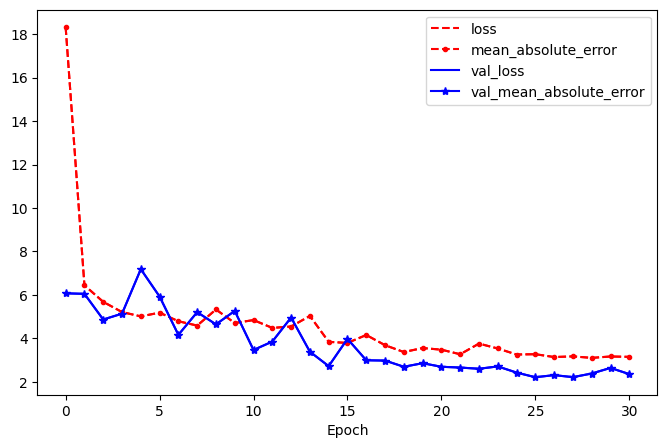

In [27]:
pd.DataFrame(mejor_hist.history).plot(
    figsize=(8, 5), xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.legend()
plt.show()

### Prediccion

In [28]:
# predecir 
y_proba = mejor_mod.predict(x_test)
i = 0
for sol in zip(y_test['Y1'],y_test['Y2']):
    print('Prediccion: {}    Sol: {}'.format(y_proba[i],sol))
    i+=1

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Prediccion: [15.992039 18.619703]    Sol: (16.47, 16.9)
Prediccion: [14.593435 16.856932]    Sol: (13.17, 16.39)
Prediccion: [29.12619  28.640474]    Sol: (32.82, 32.78)
Prediccion: [34.91227  34.110622]    Sol: (41.32, 46.23)
Prediccion: [15.34639  17.822084]    Sol: (16.69, 19.76)
Prediccion: [32.00236  31.179153]    Sol: (23.8, 24.61)
Prediccion: [28.743664 28.31952 ]    Sol: (24.31, 25.63)
Prediccion: [28.885094 28.392881]    Sol: (28.67, 29.62)
Prediccion: [15.282545 17.649958]    Sol: (19.52, 22.72)
Prediccion: [31.363062 30.74753 ]    Sol: (28.07, 34.14)
Prediccion: [15.306844 17.890291]    Sol: (18.46, 21.53)
Prediccion: [37.14427  36.836876]    Sol: (33.08, 34.11)
Prediccion: [31.414629 30.995024]    Sol: (29.79, 29.92)
Prediccion: [12.769127 14.825084]    Sol: (10.37, 13.44)
Prediccion: [15.449698 17.903578]    Sol: (17.69, 20.82)
Prediccion: [37.004128 36.61122 ]    Sol: (36.95, 36.87)
Prediccion: [37.373627 37.156643]    Sol: (36.64, 37